# Model Construction

In [1]:
#first get the data
import pandas as pd
import numpy as np

data = pd.read_csv('prepared-prices.csv')
sentiment_data = pd.read_csv('Sentiment_Scores_01Oct19_v2.csv')

In [2]:
data['movement01'] = data['movement'].apply(lambda x: 1 if x == 'up' else 0)

In [3]:
data['movement01'],data['movement']

(0      0
 1      1
 2      0
 3      0
 4      0
       ..
 937    1
 938    0
 939    1
 940    0
 941    0
 Name: movement01, Length: 942, dtype: int64, 0      down
 1        up
 2      down
 3      down
 4      down
        ... 
 937      up
 938    down
 939      up
 940    down
 941    down
 Name: movement, Length: 942, dtype: object)

In [4]:
data.index = pd.to_datetime(data['Date'])

In [5]:
sentiment_data['Date'] = sentiment_data['Unnamed: 0']
sentiment_data.index = pd.to_datetime(sentiment_data['Date'])

In [6]:
sentiment_data.drop(columns=['Unnamed: 0'])

,polarity_score,"('polarity_score', 0)","('polarity_score', 1)","('polarity_score', 2)","('polarity_score', 3)","('polarity_score', 4)","('polarity_score', 5)","('polarity_score', 6)","('polarity_score', 7)","('polarity_score', 8)",...,"('polarity_score', 15)","('polarity_score', 16)","('polarity_score', 17)","('polarity_score', 18)","('polarity_score', 19)","('polarity_score', 20)","('polarity_score', 21)","('polarity_score', 22)","('polarity_score', 23)",Date
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-29,0.354790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.301208,0.306058,0.385935,0.376037,0.451400,0.294700,0.576425,0.372012,0.318675,2019-07-29
2019-07-30,0.280832,0.364950,0.707409,0.315633,0.111529,0.325000,0.453280,0.746567,0.413980,0.102327,...,0.360943,0.331811,0.255305,0.314373,0.279517,0.236305,0.320825,0.336591,0.354464,2019-07-30
2019-07-31,0.267928,0.303080,0.428364,0.361763,0.335453,0.323726,0.439164,0.188525,0.381611,0.250713,...,0.276631,0.237553,0.266528,0.078307,0.282219,0.249884,0.234240,0.134884,0.308312,2019-07-31
2019-08-01,0.203422,0.113657,0.414468,0.162233,0.330160,0.291550,0.077550,0.173580,-0.316800,-0.167660,...,0.260015,0.229106,0.144623,0.160088,0.205466,0.215166,0.197728,0.236182,0.295530,2019-08-01
2019-08-02,0.179844,0.371059,0.104900,0.073920,0.227532,0.254908,0.251108,0.138930,0.197471,0.066211,...,0.206572,0.185265,0.229369,0.136192,0.181402,0.166013,0.280012,0.448040,0.316156,2019-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-27,0.264485,0.285688,0.414280,0.257600,0.113400,0.295300,0.210050,0.612167,0.623500,-0.127800,...,0.068073,0.214080,0.319836,0.269164,0.442438,0.202244,0.243680,-0.174160,0.477737,2019-09-27
2019-09-28,0.321577,0.241517,0.449282,0.396767,0.511950,0.196657,0.330967,0.680700,NaN,0.930700,...,0.515980,0.404260,0.674100,0.170260,0.509233,0.133567,-0.026400,0.214700,0.709700,2019-09-28
2019-09-29,0.315964,NaN,NaN,0.657350,0.602350,NaN,0.168314,0.729167,NaN,NaN,...,0.341157,0.445833,0.265385,0.448700,0.251533,0.313992,0.314440,0.149367,0.134429,2019-09-29


In [7]:
data = pd.concat([data, sentiment_data], axis=1)

In [8]:
next_movement = data['movement'][1:]
next_movement01 = data['movement01'][1:]
data['next-movement'] = next_movement
data['next-movement01'] = next_movement01

In [9]:
#get the required models 

In [10]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,var1(t-5),var1(t-4),var1(t-3),...,"('polarity_score', 17)","('polarity_score', 18)","('polarity_score', 19)","('polarity_score', 20)","('polarity_score', 21)","('polarity_score', 22)","('polarity_score', 23)",Date,next-movement,next-movement01
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,2015-12-31,107.01,107.03,104.82,105.26,98.66,40912300.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,2016-01-04,102.61,105.37,102.00,105.35,98.74,67649400.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,up,1.0
2016-01-05,2016-01-05,105.75,105.85,102.41,102.71,96.27,55791000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,down,0.0
2016-01-06,2016-01-06,100.56,102.37,99.87,100.70,94.38,68457400.0,NaN,NaN,105.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,down,0.0
2016-01-07,2016-01-07,98.68,100.13,96.43,96.45,90.40,81094400.0,NaN,105.26,105.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,down,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-27,2019-09-27,220.54,220.96,217.28,218.82,218.82,25352000.0,217.73,218.72,217.68,...,0.319836,0.269164,0.442438,0.202244,0.243680,-0.174160,0.477737,2019-09-27,down,0.0
2019-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.674100,0.170260,0.509233,0.133567,-0.026400,0.214700,0.709700,2019-09-28,NaN,NaN
2019-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.265385,0.448700,0.251533,0.313992,0.314440,0.149367,0.134429,2019-09-29,NaN,NaN


In [12]:
#onehot encoding for the movement column 
dummies = pd.get_dummies(data['movement'])

In [13]:
data = pd.concat([data, dummies], axis=1)

In [14]:
data = data.fillna(0)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 963 entries, 2015-12-31 to 2019-10-01
Data columns (total 46 columns):
Date                      963 non-null object
Open                      963 non-null float64
High                      963 non-null float64
Low                       963 non-null float64
Close                     963 non-null float64
Adj Close                 963 non-null float64
Volume                    963 non-null float64
var1(t-5)                 963 non-null float64
var1(t-4)                 963 non-null float64
var1(t-3)                 963 non-null float64
var1(t-2)                 963 non-null float64
var1(t-1)                 963 non-null float64
previous-close            963 non-null float64
movement                  963 non-null object
movement01                963 non-null float64
Unnamed: 0                963 non-null object
polarity_score            963 non-null float64
('polarity_score', 0)     963 non-null float64
('polarity_score', 1)     963 non

In [16]:
data = data.reset_index(level=0, drop=True).reset_index()

In [17]:
data

,index,Date,Open,High,Low,Close,Adj Close,Volume,var1(t-5),var1(t-4),...,"('polarity_score', 19)","('polarity_score', 20)","('polarity_score', 21)","('polarity_score', 22)","('polarity_score', 23)",Date,next-movement,next-movement01,down,up
0,0,2015-12-31,107.01,107.03,104.82,105.26,98.66,40912300.0,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.0,1,0
1,1,2016-01-04,102.61,105.37,102.00,105.35,98.74,67649400.0,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,up,1.0,0,1
2,2,2016-01-05,105.75,105.85,102.41,102.71,96.27,55791000.0,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,down,0.0,1,0
3,3,2016-01-06,100.56,102.37,99.87,100.70,94.38,68457400.0,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,down,0.0,1,0
4,4,2016-01-07,98.68,100.13,96.43,96.45,90.40,81094400.0,0.00,105.26,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,down,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,958,2019-09-27,220.54,220.96,217.28,218.82,218.82,25352000.0,217.73,218.72,...,0.442438,0.202244,0.243680,-0.174160,0.477737,2019-09-27,down,0.0,1,0
959,959,0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.509233,0.133567,-0.026400,0.214700,0.709700,2019-09-28,0,0.0,0,0
960,960,0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.251533,0.313992,0.314440,0.149367,0.134429,2019-09-29,0,0.0,0,0
961,961,0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.223147,0.269098,0.336869,0.442527,0.393921,2019-09-30,0,0.0,0,0


In [18]:
data.to_csv('sentiments_and_Stocks_24_v2.csv', index_label=False)

In [19]:
data = data.drop(columns=['index', 'Date'])

In [20]:
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume,var1(t-5),var1(t-4),var1(t-3),var1(t-2),...,"('polarity_score', 18)","('polarity_score', 19)","('polarity_score', 20)","('polarity_score', 21)","('polarity_score', 22)","('polarity_score', 23)",next-movement,next-movement01,down,up
953,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.406425,0.171736,0.393960,0.337375,0.394027,0.157925,0,0.0,0,0
954,218.95,219.84,217.65,218.72,218.72,19165500.0,219.90,220.70,222.77,220.96,...,0.261723,0.230832,0.123162,0.167173,0.324933,0.192409,up,1.0,0,1
955,221.03,222.49,217.19,217.68,217.68,31190800.0,220.70,222.77,220.96,217.73,...,0.291508,0.188630,0.188076,0.100687,0.219986,0.386885,down,0.0,1,0
956,218.55,221.50,217.14,221.03,221.03,21903400.0,222.77,220.96,217.73,218.72,...,0.271160,0.323053,0.089138,0.258291,0.461406,0.295829,up,1.0,0,1
957,220.00,220.94,218.83,219.89,219.89,18833500.0,220.96,217.73,218.72,217.68,...,0.272396,0.148258,0.229536,0.305687,0.256840,0.395600,down,0.0,1,0
958,220.54,220.96,217.28,218.82,218.82,25352000.0,217.73,218.72,217.68,221.03,...,0.269164,0.442438,0.202244,0.243680,-0.174160,0.477737,down,0.0,1,0
959,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.170260,0.509233,0.133567,-0.026400,0.214700,0.709700,0,0.0,0,0
960,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.448700,0.251533,0.313992,0.314440,0.149367,0.134429,0,0.0,0,0
961,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.256673,0.223147,0.269098,0.336869,0.442527,0.393921,0,0.0,0,0
962,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0,0,0


In [21]:
data.fillna(0)

,Open,High,Low,Close,Adj Close,Volume,var1(t-5),var1(t-4),var1(t-3),var1(t-2),...,"('polarity_score', 18)","('polarity_score', 19)","('polarity_score', 20)","('polarity_score', 21)","('polarity_score', 22)","('polarity_score', 23)",next-movement,next-movement01,down,up
0,107.01,107.03,104.82,105.26,98.66,40912300.0,0.00,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0,1,0
1,102.61,105.37,102.00,105.35,98.74,67649400.0,0.00,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,up,1.0,0,1
2,105.75,105.85,102.41,102.71,96.27,55791000.0,0.00,0.00,0.00,105.26,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,down,0.0,1,0
3,100.56,102.37,99.87,100.70,94.38,68457400.0,0.00,0.00,105.26,105.35,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,down,0.0,1,0
4,98.68,100.13,96.43,96.45,90.40,81094400.0,0.00,105.26,105.35,102.71,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,down,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,220.54,220.96,217.28,218.82,218.82,25352000.0,217.73,218.72,217.68,221.03,...,0.269164,0.442438,0.202244,0.243680,-0.174160,0.477737,down,0.0,1,0
959,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.170260,0.509233,0.133567,-0.026400,0.214700,0.709700,0,0.0,0,0
960,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.448700,0.251533,0.313992,0.314440,0.149367,0.134429,0,0.0,0,0
961,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.256673,0.223147,0.269098,0.336869,0.442527,0.393921,0,0.0,0,0


In [22]:
data = data.drop([959, 960, 961, 962], axis=0)

In [23]:
data

,Open,High,Low,Close,Adj Close,Volume,var1(t-5),var1(t-4),var1(t-3),var1(t-2),...,"('polarity_score', 18)","('polarity_score', 19)","('polarity_score', 20)","('polarity_score', 21)","('polarity_score', 22)","('polarity_score', 23)",next-movement,next-movement01,down,up
0,107.01,107.03,104.82,105.26,98.66,40912300.0,0.00,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0,1,0
1,102.61,105.37,102.00,105.35,98.74,67649400.0,0.00,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,up,1.0,0,1
2,105.75,105.85,102.41,102.71,96.27,55791000.0,0.00,0.00,0.00,105.26,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,down,0.0,1,0
3,100.56,102.37,99.87,100.70,94.38,68457400.0,0.00,0.00,105.26,105.35,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,down,0.0,1,0
4,98.68,100.13,96.43,96.45,90.40,81094400.0,0.00,105.26,105.35,102.71,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,down,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,218.95,219.84,217.65,218.72,218.72,19165500.0,219.90,220.70,222.77,220.96,...,0.261723,0.230832,0.123162,0.167173,0.324933,0.192409,up,1.0,0,1
955,221.03,222.49,217.19,217.68,217.68,31190800.0,220.70,222.77,220.96,217.73,...,0.291508,0.188630,0.188076,0.100687,0.219986,0.386885,down,0.0,1,0
956,218.55,221.50,217.14,221.03,221.03,21903400.0,222.77,220.96,217.73,218.72,...,0.271160,0.323053,0.089138,0.258291,0.461406,0.295829,up,1.0,0,1
957,220.00,220.94,218.83,219.89,219.89,18833500.0,220.96,217.73,218.72,217.68,...,0.272396,0.148258,0.229536,0.305687,0.256840,0.395600,down,0.0,1,0


In [24]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'var1(t-5)',
       'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'previous-close',
       'movement', 'movement01', 'Unnamed: 0', 'polarity_score',
       '('polarity_score', 0)', '('polarity_score', 1)',
       '('polarity_score', 2)', '('polarity_score', 3)',
       '('polarity_score', 4)', '('polarity_score', 5)',
       '('polarity_score', 6)', '('polarity_score', 7)',
       '('polarity_score', 8)', '('polarity_score', 9)',
       '('polarity_score', 10)', '('polarity_score', 11)',
       '('polarity_score', 12)', '('polarity_score', 13)',
       '('polarity_score', 14)', '('polarity_score', 15)',
       '('polarity_score', 16)', '('polarity_score', 17)',
       '('polarity_score', 18)', '('polarity_score', 19)',
       '('polarity_score', 20)', '('polarity_score', 21)',
       '('polarity_score', 22)', '('polarity_score', 23)', 'next-movement',
       'next-movement01', 'down', 'up'],
      dtype='object')

In [25]:
X = data.drop(columns=['movement', 'movement01', 'next-movement01', 'next-movement', 'previous-close','Unnamed: 0', 'up', 'down'])
y = data['next-movement01']

In [26]:
X.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'var1(t-5)',
       'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'polarity_score',
       '('polarity_score', 0)', '('polarity_score', 1)',
       '('polarity_score', 2)', '('polarity_score', 3)',
       '('polarity_score', 4)', '('polarity_score', 5)',
       '('polarity_score', 6)', '('polarity_score', 7)',
       '('polarity_score', 8)', '('polarity_score', 9)',
       '('polarity_score', 10)', '('polarity_score', 11)',
       '('polarity_score', 12)', '('polarity_score', 13)',
       '('polarity_score', 14)', '('polarity_score', 15)',
       '('polarity_score', 16)', '('polarity_score', 17)',
       '('polarity_score', 18)', '('polarity_score', 19)',
       '('polarity_score', 20)', '('polarity_score', 21)',
       '('polarity_score', 22)', '('polarity_score', 23)'],
      dtype='object')

In [27]:
split_index = int(len(X) * 0.75)
split_index

719

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 958
Data columns (total 36 columns):
Open                      959 non-null float64
High                      959 non-null float64
Low                       959 non-null float64
Close                     959 non-null float64
Adj Close                 959 non-null float64
Volume                    959 non-null float64
var1(t-5)                 959 non-null float64
var1(t-4)                 959 non-null float64
var1(t-3)                 959 non-null float64
var1(t-2)                 959 non-null float64
var1(t-1)                 959 non-null float64
polarity_score            959 non-null float64
('polarity_score', 0)     959 non-null float64
('polarity_score', 1)     959 non-null float64
('polarity_score', 2)     959 non-null float64
('polarity_score', 3)     959 non-null float64
('polarity_score', 4)     959 non-null float64
('polarity_score', 5)     959 non-null float64
('polarity_score', 6)     959 non-null float64
('

In [29]:
# split into inputs and outputs --- NOT USING NORMAL SPLITING SINCE THIS IS TIME SERIES
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

X_train = X.iloc[:split_index, :]
X_test = X.iloc[split_index:, :]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

In [30]:
X_test

,Open,High,Low,Close,Adj Close,Volume,var1(t-5),var1(t-4),var1(t-3),var1(t-2),...,"('polarity_score', 14)","('polarity_score', 15)","('polarity_score', 16)","('polarity_score', 17)","('polarity_score', 18)","('polarity_score', 19)","('polarity_score', 20)","('polarity_score', 21)","('polarity_score', 22)","('polarity_score', 23)"
719,205.97,210.06,204.13,209.95,206.74,33424400.0,218.86,222.22,207.48,201.59,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
720,209.98,210.12,206.75,208.49,206.02,25362600.0,222.22,207.48,201.59,203.77,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
721,205.55,206.01,202.25,204.47,202.05,34365800.0,207.48,201.59,203.77,209.95,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
722,199.00,199.85,193.79,194.17,191.87,51135500.0,201.59,203.77,209.95,208.49,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
723,191.63,197.18,191.45,192.23,189.95,46882900.0,203.77,209.95,208.49,204.47,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,218.95,219.84,217.65,218.72,218.72,19165500.0,219.90,220.70,222.77,220.96,...,0.190828,0.270535,0.343049,0.281083,0.261723,0.230832,0.123162,0.167173,0.324933,0.192409
955,221.03,222.49,217.19,217.68,217.68,31190800.0,220.70,222.77,220.96,217.73,...,0.255356,0.172998,0.122513,0.179332,0.291508,0.188630,0.188076,0.100687,0.219986,0.386885
956,218.55,221.50,217.14,221.03,221.03,21903400.0,222.77,220.96,217.73,218.72,...,0.285036,0.268549,0.207200,0.304985,0.271160,0.323053,0.089138,0.258291,0.461406,0.295829
957,220.00,220.94,218.83,219.89,219.89,18833500.0,220.96,217.73,218.72,217.68,...,0.173313,0.299513,0.273171,0.239180,0.272396,0.148258,0.229536,0.305687,0.256840,0.395600


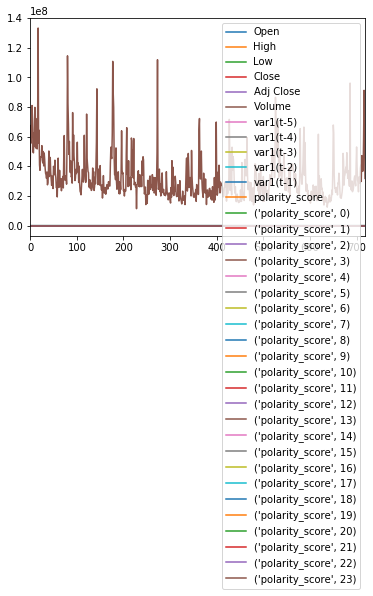

In [31]:
X_train.plot()

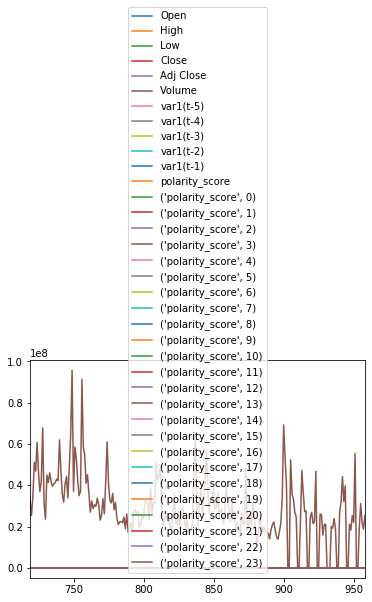

In [32]:
X_test.plot()

In [33]:
print(y_test)

719    1.0
720    0.0
721    0.0
722    0.0
723    0.0
      ... 
954    1.0
955    0.0
956    1.0
957    0.0
958    0.0
Name: next-movement01, Length: 240, dtype: float64


LR 67.917%
KNN 58.750%
KNN-7 62.500%
CART 65.417%
SVM 58.750%
RF 69.583%


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GBM 66.250%


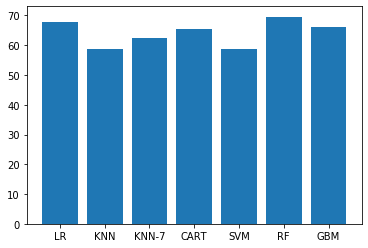

In [34]:
# create a list of models to evaluate
models, names = list(), list()
# logistic
models.append(LogisticRegression())
names.append('LR')
# knn
models.append(KNeighborsClassifier())
names.append('KNN')
# knn
models.append(KNeighborsClassifier(n_neighbors=7))
names.append('KNN-7')
# cart
models.append(DecisionTreeClassifier())
names.append('CART')
# svm
models.append(SVC())
names.append('SVM')
# random forest
models.append(RandomForestClassifier())
names.append('RF')
# gbm
models.append(GradientBoostingClassifier())
names.append('GBM')
# evaluate models
all_scores = list()
for i in range(len(models)):
	# create a pipeline for the model
	scaler = StandardScaler()
	model = Pipeline(steps=[('s',scaler), ('m',models[i])])
	# fit
	# model = models[i]
	model.fit(X_train, y_train)
	# predict
	yhat = model.predict(X_test)
	# evaluate
	score = accuracy_score(y_test, yhat) * 100
	all_scores.append(score)
	# summarize
	print('%s %.3f%%' % (names[i], score))
# plot
pyplot.bar(names, all_scores)
pyplot.show()

In [35]:
X.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'var1(t-5)',
       'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'polarity_score',
       '('polarity_score', 0)', '('polarity_score', 1)',
       '('polarity_score', 2)', '('polarity_score', 3)',
       '('polarity_score', 4)', '('polarity_score', 5)',
       '('polarity_score', 6)', '('polarity_score', 7)',
       '('polarity_score', 8)', '('polarity_score', 9)',
       '('polarity_score', 10)', '('polarity_score', 11)',
       '('polarity_score', 12)', '('polarity_score', 13)',
       '('polarity_score', 14)', '('polarity_score', 15)',
       '('polarity_score', 16)', '('polarity_score', 17)',
       '('polarity_score', 18)', '('polarity_score', 19)',
       '('polarity_score', 20)', '('polarity_score', 21)',
       '('polarity_score', 22)', '('polarity_score', 23)'],
      dtype='object')

In [36]:
#try without the sentiment values: 
X = data.drop(columns=['movement','movement01','next-movement', 'next-movement01', 'Unnamed: 0', 'up', 'down', 'polarity_score', '(\'polarity_score\', 0)', '(\'polarity_score\', 1)',
       '(\'polarity_score\', 2)', '(\'polarity_score\', 3)',
       '(\'polarity_score\', 4)', '(\'polarity_score\', 5)',
       '(\'polarity_score\', 6)', '(\'polarity_score\', 7)',
       '(\'polarity_score\', 8)', '(\'polarity_score\', 9)',
       '(\'polarity_score\', 10)', '(\'polarity_score\', 11)',
       '(\'polarity_score\', 12)', '(\'polarity_score\', 13)',
       '(\'polarity_score\', 14)', '(\'polarity_score\', 15)',
       '(\'polarity_score\', 16)', '(\'polarity_score\', 17)',
       '(\'polarity_score\', 18)', '(\'polarity_score\', 19)',
       '(\'polarity_score\', 20)', '(\'polarity_score\', 21)',
       '(\'polarity_score\', 22)', '(\'polarity_score\', 23)'])



In [37]:
X.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'var1(t-5)',
       'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'previous-close'],
      dtype='object')

In [38]:
y

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
954    1.0
955    0.0
956    1.0
957    0.0
958    0.0
Name: next-movement01, Length: 959, dtype: float64

LR 67.917%
KNN 58.750%
KNN-7 62.500%
CART 65.833%


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM 58.750%
RF 68.333%
GBM 65.417%


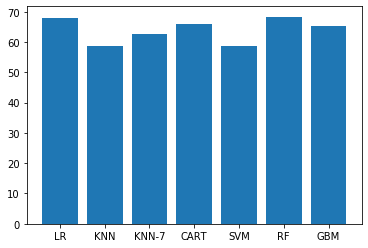

In [39]:
# create a list of models to evaluate
models, names = list(), list()
# logistic
models.append(LogisticRegression())
names.append('LR')
# knn
models.append(KNeighborsClassifier())
names.append('KNN')
# knn
models.append(KNeighborsClassifier(n_neighbors=7))
names.append('KNN-7')
# cart
models.append(DecisionTreeClassifier())
names.append('CART')
# svm
models.append(SVC())
names.append('SVM')
# random forest
models.append(RandomForestClassifier())
names.append('RF')
# gbm
models.append(GradientBoostingClassifier())
names.append('GBM')
# evaluate models
all_scores = list()
for i in range(len(models)):
	# create a pipeline for the model
	scaler = StandardScaler()
	model = Pipeline(steps=[('s',scaler), ('m',models[i])])
	# fit
	# model = models[i]
	model.fit(X_train, y_train)
	# predict
	yhat = model.predict(X_test)
	# evaluate
	score = accuracy_score(y_test, yhat) * 100
	all_scores.append(score)
	# summarize
	print('%s %.3f%%' % (names[i], score))
# plot
pyplot.bar(names, all_scores)
pyplot.show()

From with sentiment:
    LR 70.588%
    KNN 60.392%
    KNN-7 62.353%
    CART 59.216%
    SVM 60.000%
    RF 67.059%
    GBM 66.667%

In [40]:
#now lets try with deep learning using keras 
import keras
from keras.utils import to_categorical
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.models import Sequential
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [41]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'var1(t-5)',
       'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'previous-close',
       'movement', 'movement01', 'Unnamed: 0', 'polarity_score',
       '('polarity_score', 0)', '('polarity_score', 1)',
       '('polarity_score', 2)', '('polarity_score', 3)',
       '('polarity_score', 4)', '('polarity_score', 5)',
       '('polarity_score', 6)', '('polarity_score', 7)',
       '('polarity_score', 8)', '('polarity_score', 9)',
       '('polarity_score', 10)', '('polarity_score', 11)',
       '('polarity_score', 12)', '('polarity_score', 13)',
       '('polarity_score', 14)', '('polarity_score', 15)',
       '('polarity_score', 16)', '('polarity_score', 17)',
       '('polarity_score', 18)', '('polarity_score', 19)',
       '('polarity_score', 20)', '('polarity_score', 21)',
       '('polarity_score', 22)', '('polarity_score', 23)', 'next-movement',
       'next-movement01', 'down', 'up'],
      dtype='object')

In [42]:
X = data.drop(columns=['movement', 'movement01', 'next-movement',
       'next-movement01', 'down', 'up', 'Unnamed: 0', 'previous-close'])
y = data['next-movement01']

In [43]:
X.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'var1(t-5)',
       'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'polarity_score',
       '('polarity_score', 0)', '('polarity_score', 1)',
       '('polarity_score', 2)', '('polarity_score', 3)',
       '('polarity_score', 4)', '('polarity_score', 5)',
       '('polarity_score', 6)', '('polarity_score', 7)',
       '('polarity_score', 8)', '('polarity_score', 9)',
       '('polarity_score', 10)', '('polarity_score', 11)',
       '('polarity_score', 12)', '('polarity_score', 13)',
       '('polarity_score', 14)', '('polarity_score', 15)',
       '('polarity_score', 16)', '('polarity_score', 17)',
       '('polarity_score', 18)', '('polarity_score', 19)',
       '('polarity_score', 20)', '('polarity_score', 21)',
       '('polarity_score', 22)', '('polarity_score', 23)'],
      dtype='object')

In [44]:
# split into inputs and outputs
X_train = X.iloc[:split_index, :]
X_test = X.iloc[split_index:, :]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

In [45]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoder.fit(y_test)
encoded_Y_train = encoder.transform(y_train)
encoded_Y_test = encoder.transform(y_test)

In [46]:
def create_larger():
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=36, activation='relu'))
    #model.add(Dense(50, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [47]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=150, batch_size=36, verbose=0)))

In [48]:
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, encoded_Y_train, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Larger: 87.35% (2.73%)


In [49]:
results

array([0.86301368, 0.84931505, 0.875     , 0.84722221, 0.8888889 ,
       0.8888889 , 0.90277779, 0.90140843, 0.81690139, 0.90140843])

In [50]:
pipeline.fit(X_train, encoded_Y_train)

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x7fdea37857d0>)],
         verbose=False)

In [51]:
pipeline.score(X_test, encoded_Y_test)

0.7791666388511658

In [52]:
#now try to do the same without the sentiments: 
#try without the sentiment values: 
X = X.drop(columns=['polarity_score', '(\'polarity_score\', 0)', '(\'polarity_score\', 1)',
       '(\'polarity_score\', 2)', '(\'polarity_score\', 3)',
       '(\'polarity_score\', 4)', '(\'polarity_score\', 5)',
       '(\'polarity_score\', 6)', '(\'polarity_score\', 7)',
       '(\'polarity_score\', 8)', '(\'polarity_score\', 9)',
       '(\'polarity_score\', 10)', '(\'polarity_score\', 11)',
       '(\'polarity_score\', 12)', '(\'polarity_score\', 13)',
       '(\'polarity_score\', 14)', '(\'polarity_score\', 15)',
       '(\'polarity_score\', 16)', '(\'polarity_score\', 17)',
       '(\'polarity_score\', 18)', '(\'polarity_score\', 19)',
       '(\'polarity_score\', 20)', '(\'polarity_score\', 21)',
       '(\'polarity_score\', 22)', '(\'polarity_score\', 23)'])

y = data['next-movement01']
# split into inputs and outputs
X_train = X.iloc[:706, :]
X_test = X.iloc[706:, :]

y_train = y.iloc[:706]
y_test = y.iloc[706:]

In [53]:
X.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'var1(t-5)',
       'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)'],
      dtype='object')

In [54]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoder.fit(y_test)
encoded_Y_train = encoder.transform(y_train)
encoded_Y_test = encoder.transform(y_test)

In [55]:
def create_larger():
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=11, activation='relu'))
    #model.add(Dense(50, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [56]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=150, batch_size=11, verbose=0)))

In [57]:
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, encoded_Y_train, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 88.38% (2.62%)


In [58]:
pipeline.fit(X_train, encoded_Y_train)

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x7fdeba2f2710>)],
         verbose=False)

In [59]:
pipeline.score(X_test, encoded_Y_test)

0.7351778745651245

In [60]:
X_test.head()

,Open,High,Low,Close,Adj Close,Volume,var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
706,218.06,221.26,217.43,219.31,215.96,33078700.0,222.11,217.36,222.15,221.19,216.02
707,219.79,223.36,218.94,220.65,217.28,28792100.0,217.36,222.15,221.19,216.02,219.31
708,215.83,223.25,214.70,222.73,219.33,38767800.0,222.15,221.19,216.02,219.31,220.65
709,222.60,224.23,214.54,215.09,211.80,40925500.0,221.19,216.02,219.31,220.65,222.73
710,217.71,221.38,216.75,219.80,216.44,29855800.0,216.02,219.31,220.65,222.73,215.09


In [61]:
encoded_Y_test

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [62]:
sample1 = np.array(X_test.iloc[0, :]).reshape(1, -1)

In [63]:
type(sample1)

numpy.ndarray

In [64]:
pipeline.predict(sample1)[0][0]

1

In [65]:
#lets use the previous closes only!
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'var1(t-5)',
       'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'previous-close',
       'movement', 'movement01', 'Unnamed: 0', 'polarity_score',
       '('polarity_score', 0)', '('polarity_score', 1)',
       '('polarity_score', 2)', '('polarity_score', 3)',
       '('polarity_score', 4)', '('polarity_score', 5)',
       '('polarity_score', 6)', '('polarity_score', 7)',
       '('polarity_score', 8)', '('polarity_score', 9)',
       '('polarity_score', 10)', '('polarity_score', 11)',
       '('polarity_score', 12)', '('polarity_score', 13)',
       '('polarity_score', 14)', '('polarity_score', 15)',
       '('polarity_score', 16)', '('polarity_score', 17)',
       '('polarity_score', 18)', '('polarity_score', 19)',
       '('polarity_score', 20)', '('polarity_score', 21)',
       '('polarity_score', 22)', '('polarity_score', 23)', 'next-movement',
       'next-movement01', 'down', 'up'],
      dtype='object')

In [66]:
#try without the market values and polarities: 
X = data.drop(columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','movement','movement01','previous-close', 'Unnamed: 0', 'up', 'down'])#, 'polarity_score', '(\'polarity_score\', 0)', '(\'polarity_score\', 1)',
#        '(\'polarity_score\', 2)', '(\'polarity_score\', 3)',
#        '(\'polarity_score\', 4)', '(\'polarity_score\', 5)',
#        '(\'polarity_score\', 6)', '(\'polarity_score\', 7)',
#        '(\'polarity_score\', 8)', '(\'polarity_score\', 9)',
#        '(\'polarity_score\', 10)', '(\'polarity_score\', 11)',
#        '(\'polarity_score\', 12)', '(\'polarity_score\', 13)',
#        '(\'polarity_score\', 14)', '(\'polarity_score\', 15)',
#        '(\'polarity_score\', 16)', '(\'polarity_score\', 17)',
#        '(\'polarity_score\', 18)', '(\'polarity_score\', 19)',
#        '(\'polarity_score\', 20)', '(\'polarity_score\', 21)',
#        '(\'polarity_score\', 22)', '(\'polarity_score\', 23)'])
y = data['movement01']
# split into inputs and outputs

In [67]:
X.columns

Index(['var1(t-5)', 'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)',
       'polarity_score', '('polarity_score', 0)', '('polarity_score', 1)',
       '('polarity_score', 2)', '('polarity_score', 3)',
       '('polarity_score', 4)', '('polarity_score', 5)',
       '('polarity_score', 6)', '('polarity_score', 7)',
       '('polarity_score', 8)', '('polarity_score', 9)',
       '('polarity_score', 10)', '('polarity_score', 11)',
       '('polarity_score', 12)', '('polarity_score', 13)',
       '('polarity_score', 14)', '('polarity_score', 15)',
       '('polarity_score', 16)', '('polarity_score', 17)',
       '('polarity_score', 18)', '('polarity_score', 19)',
       '('polarity_score', 20)', '('polarity_score', 21)',
       '('polarity_score', 22)', '('polarity_score', 23)', 'next-movement',
       'next-movement01'],
      dtype='object')

In [68]:
X_train = X.iloc[:706, :]
X_test = X.iloc[706:, :]

y_train = y.iloc[:706]
y_test = y.iloc[706:]

In [69]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoder.fit(y_test)
encoded_Y_train = encoder.transform(y_train)
encoded_Y_test = encoder.transform(y_test)

In [70]:
def create_larger():
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=30, activation='relu'))
    #model.add(Dense(50, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [71]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=150, batch_size=30, verbose=0)))

In [72]:
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, encoded_Y_train, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: could not convert string to float: 'up'

In [ ]:
results